# Single Word Idetification

In this exercise, you will explore the characteristics and create features to classify a single word.

We will use a dataset of latin names and classify them by their expected gender.
(If you prefer working on a different dataset, please feel free to create and work on another one. For example, a list of words in 2 languages, such as English/Romanian or transliterated Arabic/Berber, etc.)

Based on the nltk book: https://www.nltk.org/book/ch06.html

### Data Download

In [66]:
import nltk

In [67]:
nltk.download('names')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


True

Let's take a sneak peek:

In [68]:
nltk.corpus.names.words('male.txt')[:10]

['Aamir',
 'Aaron',
 'Abbey',
 'Abbie',
 'Abbot',
 'Abbott',
 'Abby',
 'Abdel',
 'Abdul',
 'Abdulkarim']

### Import the names Data

In [69]:
from nltk.corpus import names

In [70]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')

# Data Exploration

The first step in every task is **always** (!!!) to look at your data.

The dataset contains about 8k names:

In [71]:
print(f'there are {len(male_names)} male names and {len(female_names)} female names')

there are 2943 male names and 5001 female names


In [72]:
male_names[:10]

['Aamir',
 'Aaron',
 'Abbey',
 'Abbie',
 'Abbot',
 'Abbott',
 'Abby',
 'Abdel',
 'Abdul',
 'Abdulkarim']

In [73]:
female_names[:10]

['Abagael',
 'Abagail',
 'Abbe',
 'Abbey',
 'Abbi',
 'Abbie',
 'Abby',
 'Abigael',
 'Abigail',
 'Abigale']

Some names can be either for boys or girls - Let's check how many of these names appear in both groups:

In [74]:
## YOUR TURN:
# Find which names are common for both male and females:

double_names = [name for name in male_names if name in female_names]

print(f'There are {len(double_names)} names that are common for both male and females: \n\n {double_names}')

There are 365 names that are common for both male and females: 

 ['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel', 'Angie', 'Ariel', 'Ashley', 'Aubrey', 'Augustine', 'Austin', 'Averil', 'Barrie', 'Barry', 'Beau', 'Bennie', 'Benny', 'Bernie', 'Bert', 'Bertie', 'Bill', 'Billie', 'Billy', 'Blair', 'Blake', 'Bo', 'Bobbie', 'Bobby', 'Brandy', 'Brett', 'Britt', 'Brook', 'Brooke', 'Brooks', 'Bryn', 'Cal', 'Cam', 'Cammy', 'Carey', 'Carlie', 'Carlin', 'Carmine', 'Carroll', 'Cary', 'Caryl', 'Casey', 'Cass', 'Cat', 'Cecil', 'Chad', 'Chris', 'Chrissy', 'Christian', 'Christie', 'Christy', 'Clair', 'Claire', 'Clare', 'Claude', 'Clem', 'Clemmie', 'Cody', 'Connie', 'Constantine', 'Corey', 'Corrie', 'Cory', 'Courtney', 'Cris', 'Daffy', 'Dale', 'Dallas', 'Dana', 'Dani', 'Daniel', 'Dannie', 'Danny', 'Darby', 'Darcy', 'Darryl', 'Daryl', 'Deane', 'Del', 'Dell', 'Demetris', 'Dennie', 'Denny', 'Devi

Our task is to identify the person's gender by a given name.

This task is a **Classification** task.

In classification, the model must choose the correct label from a fixed set of possible labels.
Examples of classification task include:

- Spam detection (spam/not spam)
- Assigning a topic to an article (Politics, Sports, Economics)
- Detecting the type of a proper name (location, people, company) - also called Named Entity Recognition (NER)

A classifier is **supervised**, if it is trained using a set of correctly labeled pairs $(X → y)$.

As you may already know, no machine learning algorithm can process text as it is. We must convert it into a numerical representation for the computer to be able to process it. We achieve that using a feature extractor function:

![](https://raw.githubusercontent.com/liadmagen/NLP-Course/master/images/feature_extractor.png)

# 1. Classification with NLTK

Let's start with creating a classifier using the `nltk` package, which we got to know in the first exercise.

For this, we first create a small 'dataset' that combines both the female and the male names:

In [75]:
labeled_names = ([(name, 'male') for name in male_names] + [(name, 'female') for name in female_names])

Then, we shuffle the names. This is always a good idea to shuffle the samples order - not to teach our models to be expecting any specific order...

In [76]:
import random

random.shuffle(labeled_names)

Computers and machine learning models can't read. They don't understand the notion of words or characters. Every character is represented by some number.

For example, the [ASCII code](https://www.ascii-code.com/) represents the letter 'A' as the number 65, and the letter 'a' as 97.  
[Unicode](https://home.unicode.org/), expands ASCII further, and adds newer characters, such as "€" which is represented by the code `8364`, or the smily-face emoji 😊 which is represented by the code `128522`.  

In Python, you can achieve the unicode of character using the [`ord`](https://docs.python.org/3/library/functions.html#ord) method.  

And yet, these numbers don't mean much. It doesn't hold a special numerical meaning when it represents a vowel or constant, a frequent letter such as 'e', versus a relatively 'new' letter in the alphabeth, such as "V" vs "U", or "Z"...

As linguists, we can use our language knowledge to craft new numerical features that represents better the data.

**Think**: Which features can you craft to represent the gender in a first name?  
Also, you might want to visualize and explore the data with statistical tools to find feature ideas.

In [77]:
print(ord('A')) # Output: 65
print(ord('a')) # Output: 97
print(ord('€')) # Output: 8364
print(ord('😊')) # Output: 128522

65
97
8364
128522


In [78]:
### YOUR TURN:
### Write a feature function that generate features to help a model deciding if
### a name is male or female.
### Given a name (first_name), return a dictionary of such features
### To get the unicode of a character, you can use the ord method

def gender_features(first_name: str) -> dict[str, float]:
  # Which features can we use to detect the gender? -> last character
  # Craft at least one feature and return it as a feature dictionary
  features = {}

  #feature 1: does name end in "a"
  last_character = first_name[-1].lower()
  features["ends_with_vowel"] = 1.0 if last_character == "a" else 0.0

  #feature 2: does name end in a consonant
  vowels = "aeiou"
  features["ends_with_consonant"] = 1.0 if last_character not in vowels else 0.0

  #feature 3: name length
  features["name_length"] = len(first_name)

  #feature 4: Unicode value of the last character
  last_character = first_name[-1].lower()
  features["last_character_unicode"] = ord(last_character)

  return features

Now that we have a feature function, we can use it to convert our dataset into numerical features, and train our first Machine Learning model:

In [79]:
feature_sets = [(gender_features(first_name), gender) for (first_name, gender) in labeled_names]

# We split the dataset to create a previously unseen 'exam' for the model:
train_set, test_set = feature_sets[500:], feature_sets[:500]

# And then, define and train the NLTK classifier
name_classifier = nltk.DecisionTreeClassifier.train(train_set)

In [80]:
for name in ["Bill", "Melissa", "Barack", "Michelle", "Joe", "Jill", "Donald", "Ivanka"]:
  predicted_gender = name_classifier.classify(gender_features(name))
  print(f"the gender prediction for {name} is {predicted_gender}")

the gender prediction for Bill is male
the gender prediction for Melissa is female
the gender prediction for Barack is male
the gender prediction for Michelle is female
the gender prediction for Joe is female
the gender prediction for Jill is male
the gender prediction for Donald is male
the gender prediction for Ivanka is female


In [81]:
print(nltk.classify.accuracy(name_classifier, test_set))

0.782


In [82]:
print(name_classifier.pretty_format())

last_character_unicode=100? ........................... male
last_character_unicode=101? ........................... male
  name_length=10? ..................................... female
  name_length=11? ..................................... female
  name_length=12? ..................................... female
  name_length=13? ..................................... female
  name_length=15? ..................................... male
  name_length=3? ...................................... female
  name_length=4? ...................................... female
  name_length=5? ...................................... female
  name_length=6? ...................................... female
  name_length=7? ...................................... female
  name_length=8? ...................................... female
  name_length=9? ...................................... female
last_character_unicode=102? ........................... male
last_character_unicode=103? ........................... male
  

# 2. Classification with Scikit-Learn

[Science-Kit Learn](https://scikit-learn.org/stable/index.html) (or SKLearn) is an excellent package for machine learning and is widely used.  
It offers many different models, for both supervised and unsupervised learning, as well as tools such as pipelines that enables us to combine models together (ensemble).

Let's use its Decision Tree model, together with metric tools to evaluate how well our model does:

In [83]:
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt

In [84]:
# Maps to convert labels into numerical ids:

label2idx = {'male':0, 'female': 1}
idx2label = {0: 'male', 1: 'female'}

We start by creating our dataset (X) and our prediction targets (y).

Our goal is to create a discriminative model: $f(X) → y$

In [85]:
X = male_names + female_names
y = [label2idx['male']] * len(male_names) + [label2idx['female']] * len(female_names)

And divide our data into a training-set, and an unseen testing-set:

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=1234, stratify=y)

This method, [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) is very important and you will be using it quite often. Let's get to know it better!

The method receives 5 arguments here:
- `X` & `y`, are the data and the corresponding labels
- `shuffle` - When set to `True`, it randomly sorts the samples. We constructed the dataset from a list of males names, followed by the females. We must scramble them both a bit to have a good mix.
- `random_state` - As much as we want it mixed, we also want the ability to reproduce exactly the same randomly sorted values. `random_state` value "fixes" the random function to always output the same "randomly" sorted results. It can be any numerical value. As long as you always pass the _same_ numerical value, the randomly sorted list output will also stay the same.
- `stratify` - Our dataset is uneven: we have a 3:5 male to female names ratio. We want to keep that ratio also while splitting the dataset, so our exam, the test-set, will have a similar ratio as the training. Stratify takes care that despite the randomly split, the ratio will be kept.  

In [87]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

It is the time to initialize our [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

In [88]:
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=1234)

And of course, we need our Feature Function again.  
However, unlike NLTK, which required a **dictionary** of features, when working with SKLearn, we need to use a **list** of numerical features (a vector).

Here, we just return the last letter of the name as a feature. The python function [`ord`](https://docs.python.org/3/library/functions.html#ord) returns the unicode numerical code of the character.

In [89]:
def gender_feature_function(first_name: str) -> list[float]:
  """
  Given a first name, return the features to represent it.

  Args:
    first_name (string): a string representing a first name.

  Returns:
    A list of numerical features
  """
  last_letter_code = ord(first_name[-1])
  return [last_letter_code]

In [90]:
assert gender_feature_function("Željko") == [111]

Now we can use our feature function and convert our data into numerical features:

In [91]:
X_train = list(map(gender_feature_function, X_train))
X_test = list(map(gender_feature_function, X_test))

In [92]:
X_train[:10]

[[101], [104], [121], [102], [101], [114], [110], [101], [97], [101]]

Before using our training data vector for training the model, we often need to convert it from a python list, into a [NumPy](https://numpy.org/) array. NumPy is an excellent python pacakge for handling mathematical operations with Python.

In [93]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [94]:
X_train.shape

(5958, 1)

In [95]:
X_train[:10]

array([[101],
       [104],
       [121],
       [102],
       [101],
       [114],
       [110],
       [101],
       [ 97],
       [101]])

Let's take a peek and ensure our data is in the way we want it to be:

In [96]:
# zip is a python method to combine (merge) two lists into one
# with it, we can see our features, and the labels, together as a lsit of tuples
print(list(zip(X_train[:5], y_train[:5])))

[(array([101]), 0), (array([104]), 1), (array([121]), 1), (array([102]), 0), (array([101]), 1)]


And finally, we are ready to train our model:

In [97]:
clf = clf.fit(X_train, y_train)

### Visualizing our tree

We have trained a model, and now we want to understand how this model operates: Which features got more importance, which less, and in which way?

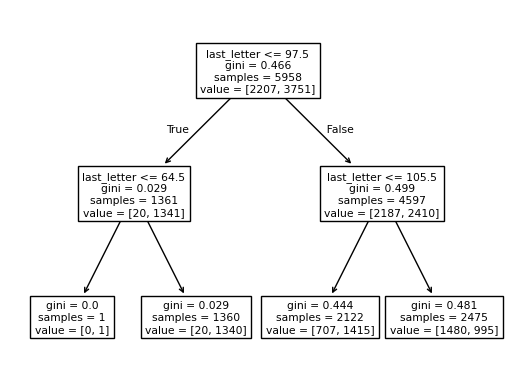

In [98]:
tree.plot_tree(clf, feature_names = ["last_letter"])
plt.show()

Now that we have a model, we can evaluate how well we did.

SKLearn has many different metrics to test our model. For classification tasks, the most common are:
- Precision
- Recall
- F-Score
- Area under curve (AUC)
- Mathew's Correlation Coefficience (MCC)

But many more exists, and it depends on the task in hand, to decide which one would represent our data bet.


Note: Be careful and don't blindly trust the metrics. Always be judgemental and stay critical about your results and achievements. Here's an [excellent video about the topic - and why we should suspect our resutls](https://www.youtube.com/watch?v=r_V1pveRKoo).

In [99]:
predictions = clf.predict(X_test)

In [100]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       736
           1       0.79      0.75      0.77      1250

    accuracy                           0.72      1986
   macro avg       0.70      0.71      0.70      1986
weighted avg       0.72      0.72      0.72      1986



---

We can use [`graphviz`](https://graphviz.org/) to visualize the tree we trained, to understand which features are more important, and therefore have more weight.

Graphviz creates an image of the tree, which looks something like this:

![](https://raw.githubusercontent.com/liadmagen/NLP-Course/master/images/DecisionTree.png)

In [101]:
import graphviz


dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=['last_letter'],
                                class_names=["male", "female"],
                                filled=True,
                                rounded=True,
                               )
graph = graphviz.Source(dot_data)

In [102]:
graph.view()

'Source.gv.pdf'

#### SuperTree
SuperTree is a newer interactive visualization package that helps us exploring decisio trees
It's an open source package, and you can find more about it here: https://github.com/mljar/supertree

In [103]:
%pip install supertree --quiet

In [104]:
from supertree import SuperTree

In [105]:
super_tree = SuperTree(clf,
                       X_test,
                       y_test,
                       feature_names=['last_letter'],
                       target_names=["male", "female"])

# show tree in your notebook
super_tree.show_tree()


## Excercise: Improve the results

With a naive last-letter feature, we got about an F-Score of ~71-73.
This is not great: 1 out of 4 names is wrongly classified.

How can we improve it further? Which features can we craft?
1. Perform statistical analysis of the dataset: which letters unigrams/bigrams/trigrams are the most common for each gender, and in which position do they appear?
2. Create additional features and re-train the model. Can you score above 80%? above 90%? above 95%?

**Exercise - My Solution**

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

label12idx = {'male':0, 'female': 1}
idx2label = {0: 'male', 1: 'female'}

X = male_names + female_names
y = [label12idx['male']] * len(male_names) + [label12idx['female']] * len(female_names)

#calculating unigrams
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))
X_vectorized = vectorizer.fit_transform(X)

feature_names = vectorizer.get_feature_names_out()

X_array = X_vectorized.toarray()


In [107]:
ngram_count = np.sum(X_array, axis=0)
ngram_frequency = dict(zip(feature_names, ngram_count))
ngram_sorted = sorted(ngram_frequency.items(), key=lambda x: x[1], reverse=True)

#we want to know the most common unigrams:
most_common_unigrams = ngram_sorted[:10]
print("Most common unigrams:\n", most_common_unigrams)

Most common unigrams:
 [('a', 6233), ('e', 6127), ('i', 4235), ('n', 4086), ('r', 3858), ('l', 3753), ('o', 2276), ('t', 2252), ('s', 1994), ('d', 1760)]


In [108]:
#calculating bigrams
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))
X_vectorized = vectorizer.fit_transform(X)

feature_names = vectorizer.get_feature_names_out()

X_array = X_vectorized.toarray()


In [109]:
#we want to know the most common bigrams:
ngram_count = np.sum(X_array, axis=0)
ngram_frequency = dict(zip(feature_names, ngram_count))
ngram_sorted = sorted(ngram_frequency.items(), key=lambda x: x[1], reverse=True)

#we want to know the most common unigrams:
most_common_bigrams = ngram_sorted[:10]
print("Most common bigrams:\n", most_common_bigrams)

Most common bigrams:
 [('an', 1044), ('ar', 950), ('el', 879), ('ri', 813), ('in', 798), ('er', 733), ('ne', 707), ('ie', 700), ('le', 698), ('li', 676)]


In [110]:
#calculating trigrams
vectorizer = CountVectorizer(analyzer='char', ngram_range=(3, 3))
X_vectorized = vectorizer.fit_transform(X)

feature_names = vectorizer.get_feature_names_out()

X_array = X_vectorized.toarray()


In [111]:
ngram_count = np.sum(X_array, axis=0)
ngram_frequency = dict(zip(feature_names, ngram_count))
ngram_sorted = sorted(ngram_frequency.items(), key=lambda x: x[1], reverse=True)

#we want to know the most common trigrams:
most_common_trigrams = ngram_sorted[:10]
print("Most common trigrams:\n", most_common_trigrams)

Most common trigrams:
 [('ell', 272), ('mar', 243), ('ann', 232), ('ine', 202), ('lin', 197), ('ett', 193), ('ina', 184), ('ari', 172), ('eli', 170), ('and', 164)]


**Now we initialize the decision tree**

In [112]:
#split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=1234, stratify=y, test_size=0.2)

def gender_feature_function(first_name: str) -> list[float]:
  last_letter_unicode = ord(first_name[-1])
  last_two_letters_unicode = ord(first_name[-2]) if len(first_name) > 1 else 0
  last_two_letters = last_two_letters_unicode + 256 + last_letter_unicode
  first_three_letters_unicode = [ord(first_name[i]) for i in range(min(3, len(first_name)))]
  first_three_letters = sum(first_three_letters_unicode)
  return [last_letter_unicode, last_two_letters, first_three_letters]

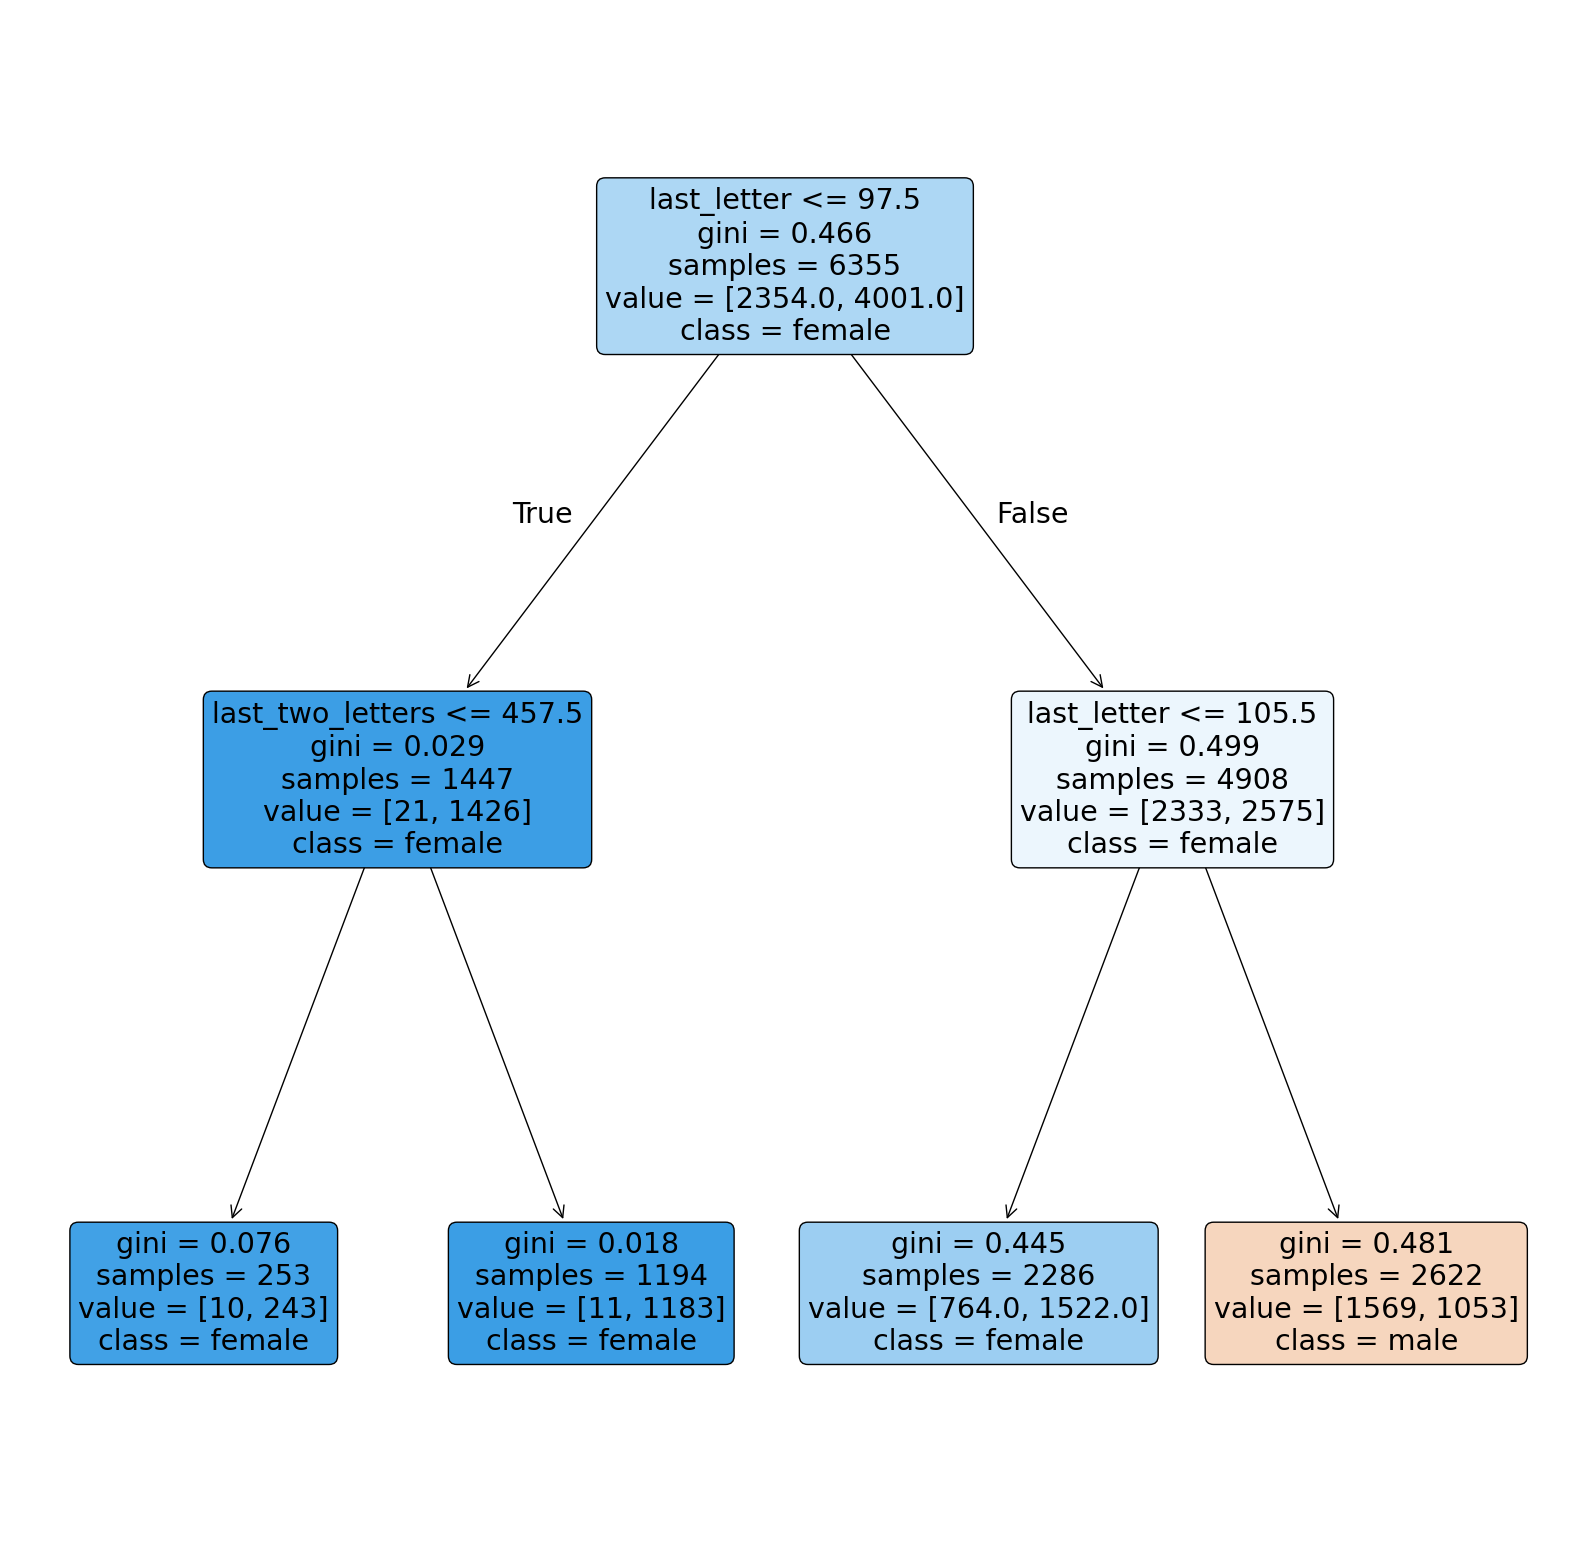

In [113]:
#apply feature function
X_train = list(map(gender_feature_function, X_train))
X_test = list(map(gender_feature_function, X_test))

X_train = np.array(X_train)
X_test = np.array(X_test)

clf = tree.DecisionTreeClassifier(max_depth=2, random_state=1234, min_samples_leaf = 1, min_samples_split = 2)
clf = clf.fit(X_train, y_train)

plt.figure(figsize=(20,20))
tree.plot_tree(clf, feature_names = ["last_letter", "last_two_letters", "first_three_letters"], class_names=["male", "female"], filled=True, rounded=True)
plt.show()

In [114]:
y_prediction = clf.predict(X_test)
print(classification_report(y_test, y_prediction, target_names=["male", "female"]))

              precision    recall  f1-score   support

        male       0.61      0.68      0.64       589
      female       0.80      0.74      0.77      1000

    accuracy                           0.72      1589
   macro avg       0.70      0.71      0.71      1589
weighted avg       0.73      0.72      0.72      1589

